In [ ]:
import torch
from foldiak.model import Foldiak
import matplotlib.pyplot as plt

# download at https://github.com/rctn/sparsecoding
from sparsecoding.visualization import plot_dictionary 
from sparsecoding.data.datasets.bars import BarsDataset

---
# Bars dataset

In [65]:
p = 0.1
patch_size = 12
dataset_size = int(1e3)
prior = torch.distributions.bernoulli.Bernoulli(p*torch.ones([2*patch_size,]))

bars_ds = BarsDataset(
    patch_size=patch_size,
    dataset_size=dataset_size,
    prior=prior,
)

bars_ds.data = bars_ds.data.reshape([dataset_size,-1])  # reshape to [n_samples,n_feautres]
bars_ds.data[bars_ds.data>1] = 1  # threshold to \in {0,1}

print(len(bars_ds))

1000


(<Figure size 400x400 with 1 Axes>, <Axes: >)

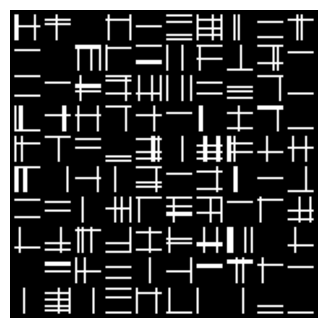

In [72]:
plot_dictionary(bars_ds[:100,:].T,nrow=10,size=4)

In [67]:
fold = Foldiak(
    n_features=patch_size**2,
    n_neurons=2*patch_size,
    p=p,
)

fold.learn_model_weights(
    data=bars_ds,
    n_epoch=150,
    warm_up_epochs=4,
    batch_size=50,
)

100%|██████████| 150/150 [00:18<00:00,  8.31it/s]


(<Figure size 800x800 with 1 Axes>, <Axes: >)

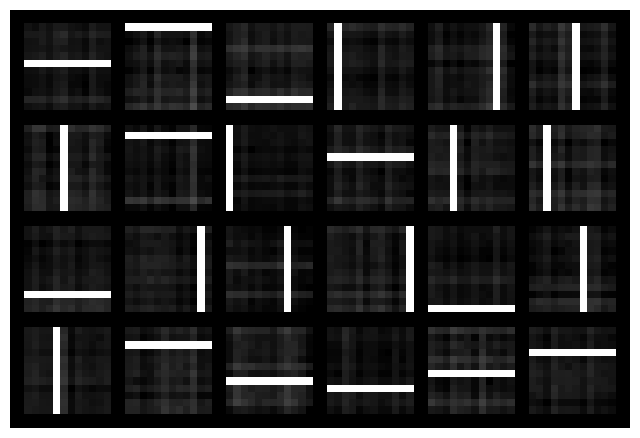

In [74]:
plot_dictionary(fold.q,nrow=6)